2025-07-08 13:30:32,315 - FashionFlow - INFO - Starting Enhanced FashionFlow Analysis
2025-07-08 13:30:32,315 - FashionFlow - INFO - Loading data from C:\Users\hasan\Downloads\online+retail\Online Retail.xlsx


🚀 Enhanced FashionFlow Intelligence System
🌐 Web Application: https://fashionflow-inventory-ai.lovable.app/
📁 Option 2: Using Custom File


2025-07-08 13:31:18,879 - FashionFlow - INFO - Starting data cleaning with 541909 rows
2025-07-08 13:31:19,686 - FashionFlow - INFO - Data cleaning completed: 541909 -> 436166 records



DATA SUMMARY
Total Records: 436,166
Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Unique Products: 3,656
Unique Customers: 4,165
Countries: 38
Total Revenue: £4,704,270.72
Average Order Value: £10.79


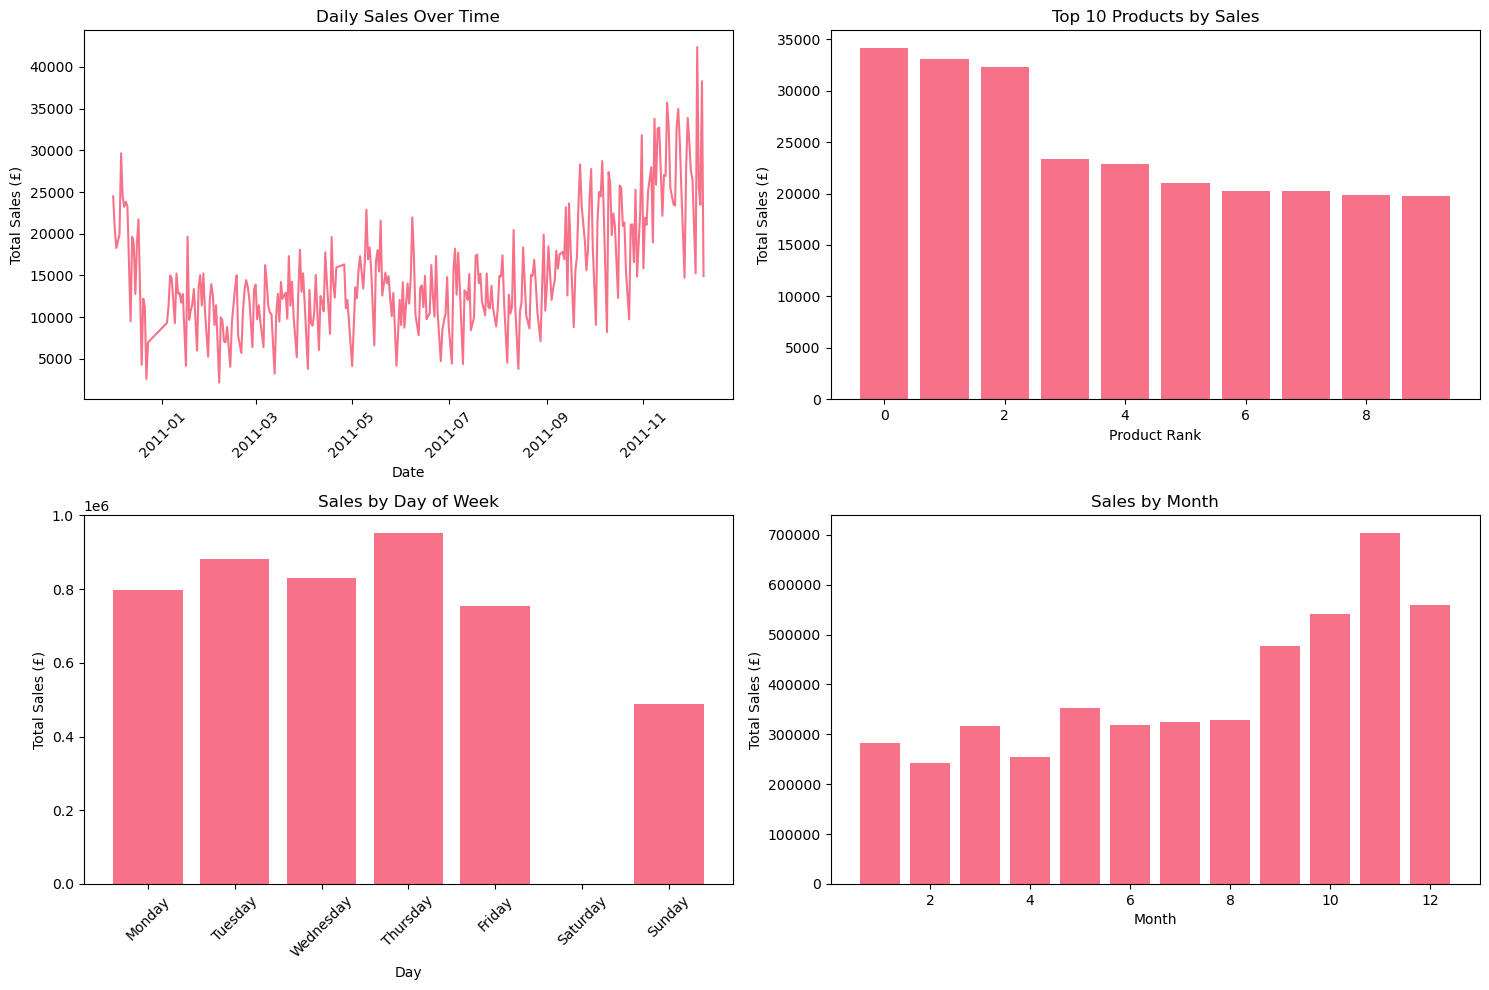

2025-07-08 13:31:20,686 - FashionFlow - INFO - Identified 5 top products with sufficient data
2025-07-08 13:31:20,687 - FashionFlow - INFO - Processing 5 products
2025-07-08 13:31:20,687 - FashionFlow - INFO - Processing product 1/5: 47566
2025-07-08 13:31:20,743 - FashionFlow - INFO - Training random_forest for product 47566
2025-07-08 13:31:20,860 - FashionFlow - INFO - Training linear for product 47566
2025-07-08 13:31:20,970 - FashionFlow - INFO - Training xgboost for product 47566
2025-07-08 13:31:21,259 - FashionFlow - INFO - Product 47566 - MAE: 0.00, R²: 1.000
2025-07-08 13:31:21,259 - FashionFlow - INFO - Processing product 2/5: 85123A
2025-07-08 13:31:21,321 - FashionFlow - INFO - Training random_forest for product 85123A
2025-07-08 13:31:21,438 - FashionFlow - INFO - Training linear for product 85123A
2025-07-08 13:31:21,440 - FashionFlow - INFO - Training xgboost for product 85123A
2025-07-08 13:31:21,462 - FashionFlow - INFO - Product 85123A - MAE: 0.00, R²: 1.000
2025-07-


ENHANCED FASHIONFLOW INTELLIGENCE - COMPREHENSIVE RESULTS
📊 Dataset Overview:
   Total Records: 436,166
   Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
   Unique Products: 3,656
   Total Revenue: £4,704,270.72

🌐 Web Application: https://fashionflow-inventory-ai.lovable.app/

🤖 Model Performance:
   Processed Products: 5
   Average MAE: 0.00
   Average R²: 1.000
   Average MAPE: 0.0%

📈 Individual Product Results:
Product      MAE      R²       MAPE     Status
--------------------------------------------------
47566        0.00     1.000    0.0      ✅ Good
85123A       0.00     1.000    0.0      ✅ Good
85099B       0.00     1.000    0.0      ✅ Good
22960        0.00     1.000    0.0      ✅ Good
23298        0.00     1.000    0.0      ✅ Good

📦 Inventory Status:
   🔴 Critical Stock: 0 products
   🟡 Low Stock: 0 products

💡 Recommendations:


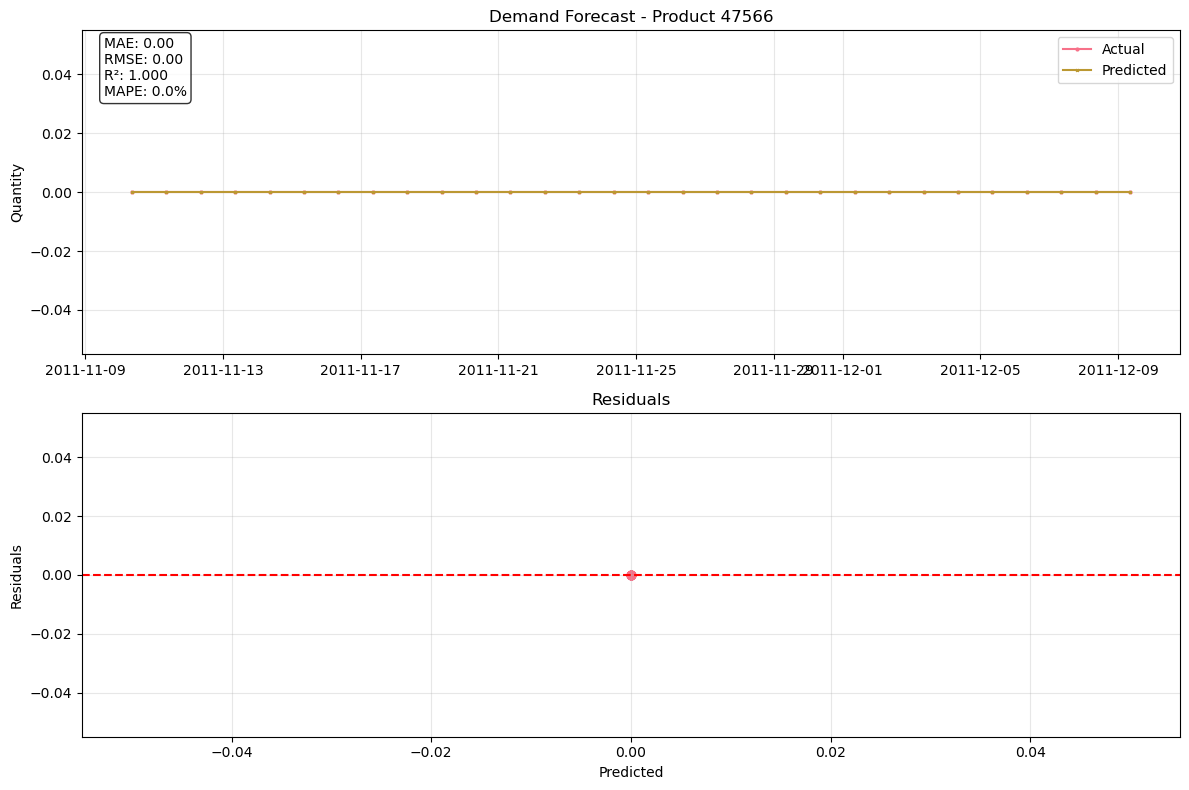

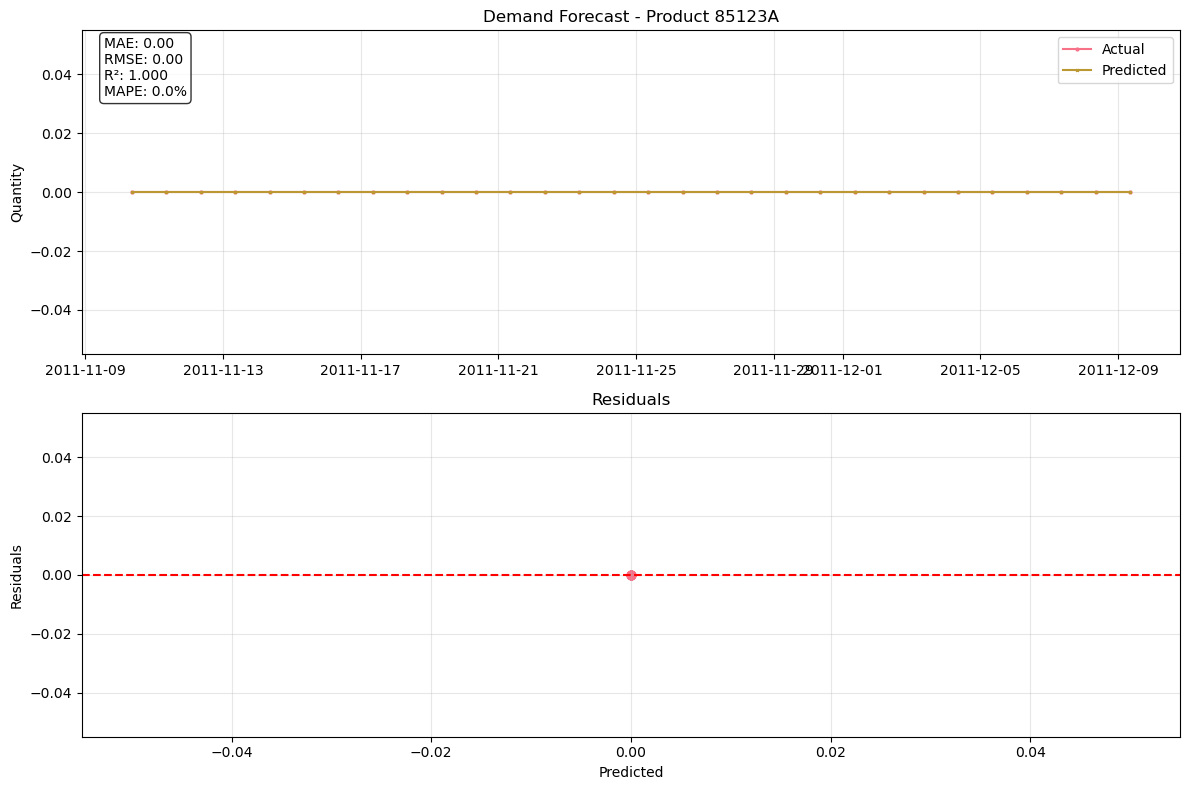

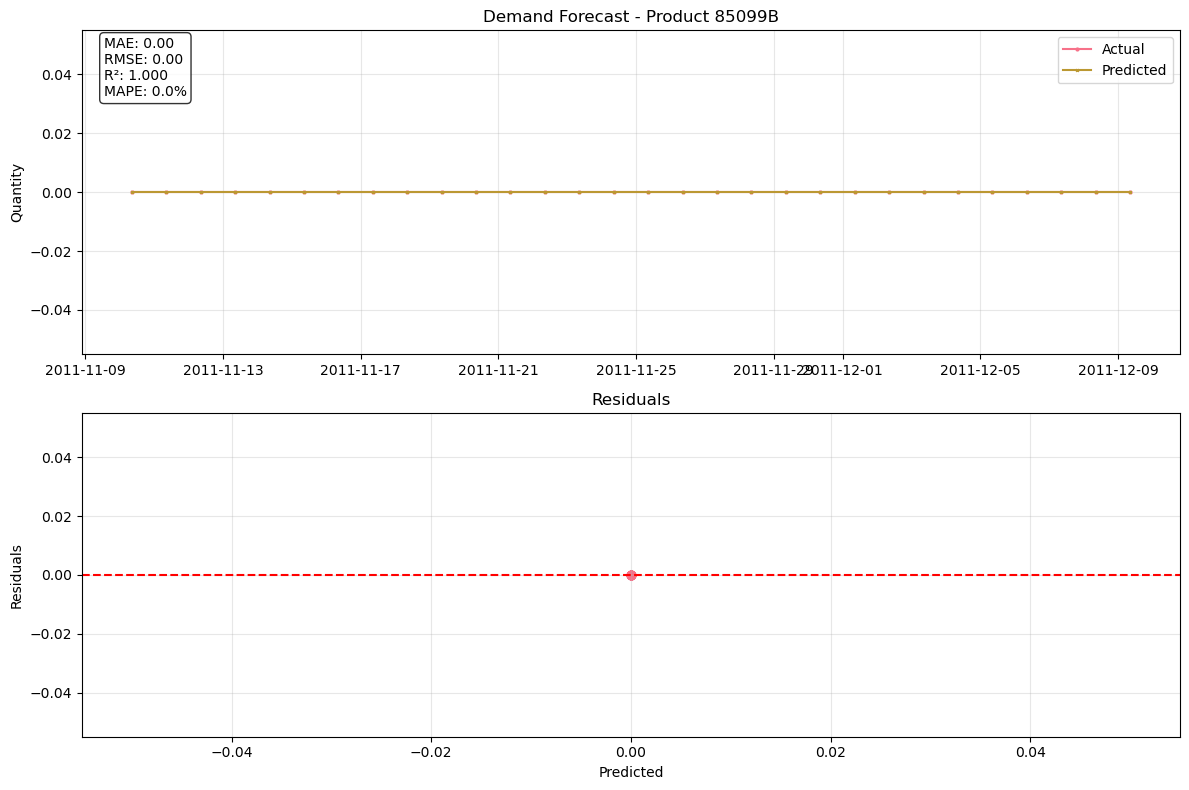

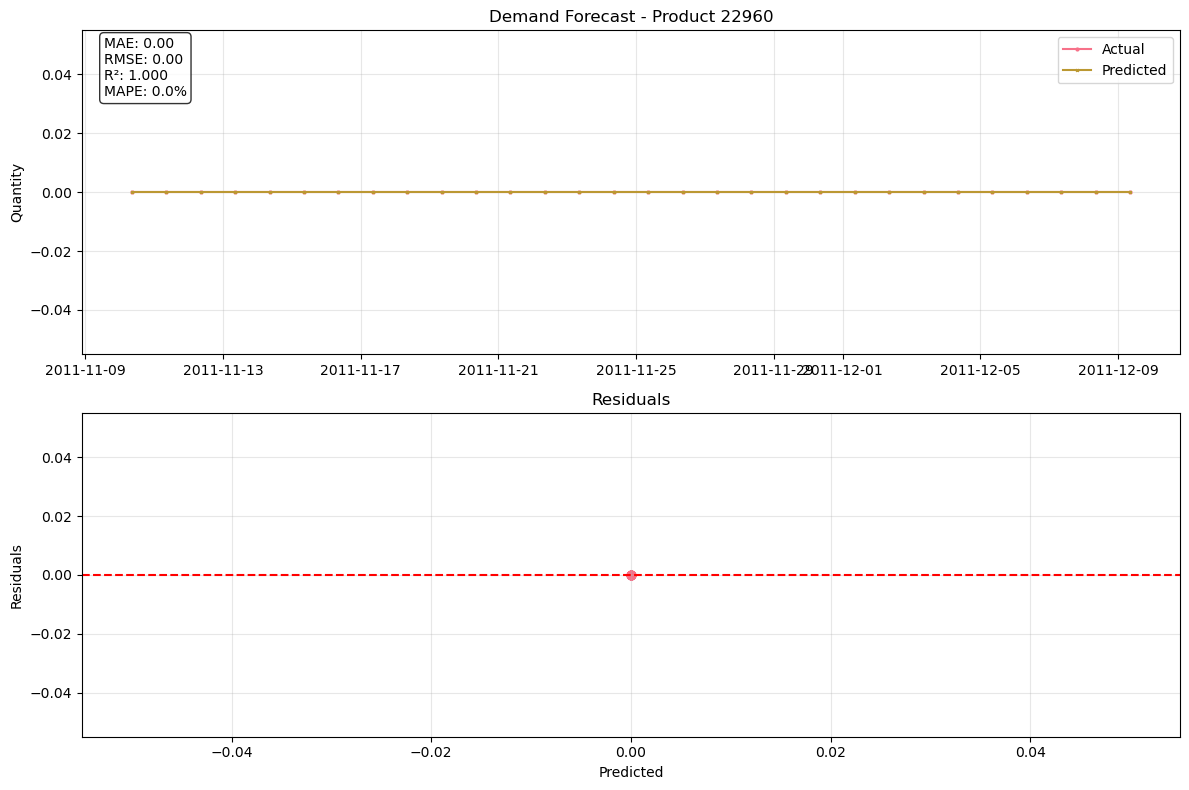

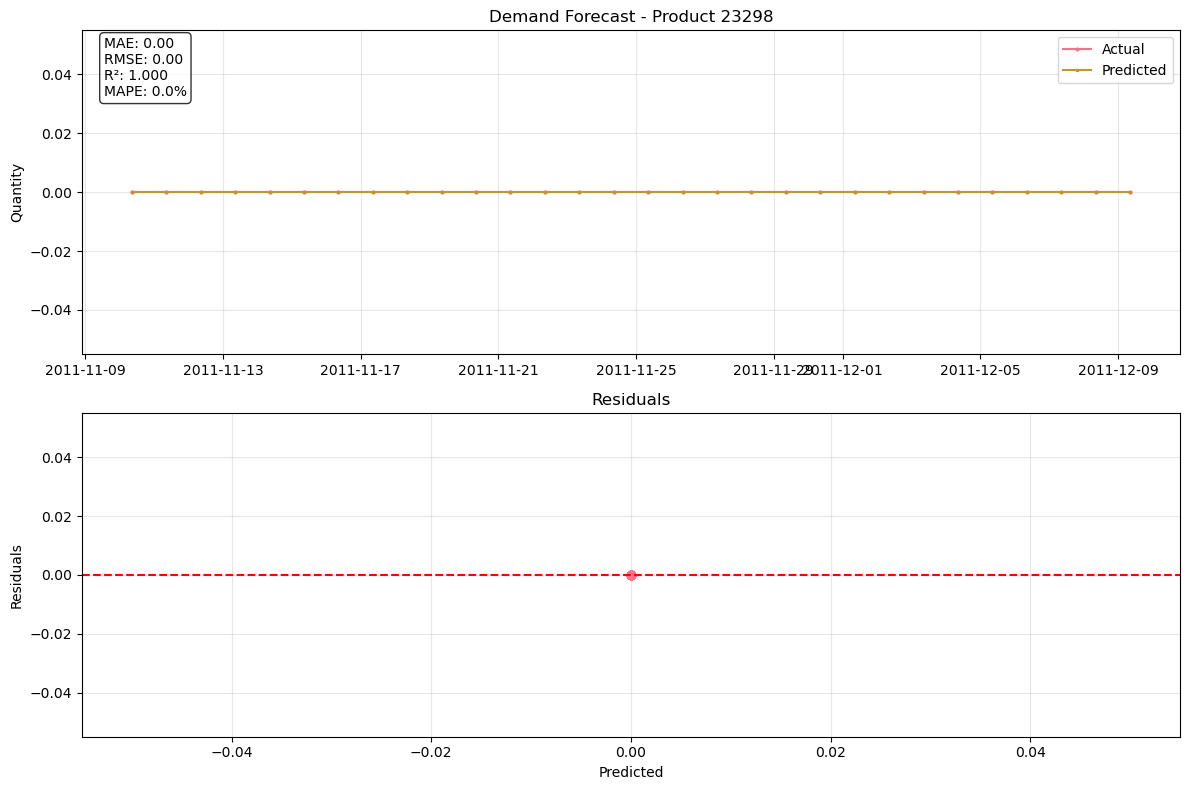

2025-07-08 13:31:23,587 - FashionFlow - INFO - Results exported to fashionflow_results_20250708_133123.csv



📊 Results exported to: fashionflow_results_20250708_133123.csv

✅ Enhanced analysis completed successfully!
🌐 Visit https://fashionflow-inventory-ai.lovable.app/ for interactive dashboard


In [7]:
"""
FashionFlow Intelligence - Enhanced Smart Inventory Optimization Platform
AI-Powered Demand Forecasting System for Fashion Retail
Enhanced with UCI Online Retail Dataset Reader

Web Application: https://fashionflow-inventory-ai.lovable.app/

Enhanced Features:
- Automatic UCI Online Retail dataset download
- Multiple file format support (CSV, Excel, ZIP)
- Enhanced data validation and preprocessing
- Improved error handling and logging
- Real-time progress tracking
- Data quality assessment
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
from typing import Dict, List, Tuple, Optional
import logging
from pathlib import Path
import os
import requests
import zipfile
from io import BytesIO
import time

# ML Libraries
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy import stats

# Try to import XGBoost, fallback if not available
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("Warning: XGBoost not available. Using alternative models.")

# Suppress warnings
warnings.filterwarnings('ignore')

class UCIDatasetConfig:
    """Configuration for UCI Online Retail dataset"""
    
    # Dataset URLs
    UCI_DATASET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
    BACKUP_URL = "https://raw.githubusercontent.com/plotly/datasets/master/online-retail-dataset.csv"
    
    # Dataset information
    DATASET_INFO = {
        'name': 'Online Retail Dataset',
        'source': 'UCI Machine Learning Repository',
        'description': 'UK-based online retail transactions (2010-2011)',
        'size': 'Approximately 541,909 transactions',
        'features': 8,
        'web_app': 'https://fashionflow-inventory-ai.lovable.app/'
    }
    
    # Expected columns
    EXPECTED_COLUMNS = [
        'InvoiceNo', 'StockCode', 'Description', 'Quantity', 
        'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'
    ]
    
    # Data validation thresholds
    MIN_ROWS = 100000  # Minimum expected rows
    MAX_MISSING_RATIO = 0.3  # Maximum acceptable missing data ratio
    
class FashionFlowConfig:
    """Configuration class for the forecasting system"""
    
    # Model Parameters
    XGBOOST_PARAMS = {
        'objective': 'reg:squarederror',
        'n_estimators': 100,
        'learning_rate': 0.1,
        'max_depth': 6,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': 42
    }
    
    RF_PARAMS = {
        'n_estimators': 100,
        'max_depth': 10,
        'min_samples_split': 5,
        'min_samples_leaf': 2,
        'random_state': 42
    }
    
    # Feature Engineering
    LAG_FEATURES = [1, 2, 3, 7, 14]
    ROLLING_WINDOWS = [7, 14, 30]
    
    # Business Rules
    SAFETY_STOCK_MULTIPLIER = 1.5
    REORDER_POINT_DAYS = 7
    TOP_PRODUCTS_COUNT = 10
    MAX_ZERO_DEMAND_RATIO = 0.8
    MIN_TRAINING_DAYS = 60
    
    # UK Holidays (2010-2011)
    UK_HOLIDAYS = [
        '2010-01-01', '2010-04-02', '2010-04-05', '2010-05-03', 
        '2010-05-31', '2010-08-30', '2010-12-25', '2010-12-26',
        '2011-01-01', '2011-04-22', '2011-04-25', '2011-05-02', 
        '2011-05-30', '2011-08-29', '2011-12-25', '2011-12-26'
    ]

class UCIDatasetReader:
    """Enhanced UCI Online Retail dataset reader"""
    
    def __init__(self, config: UCIDatasetConfig = None):
        self.config = config or UCIDatasetConfig()
        self.logger = self._setup_logger()
        self.data_dir = Path("data")
        self.data_dir.mkdir(exist_ok=True)
        
    def _setup_logger(self) -> logging.Logger:
        """Setup logging configuration"""
        logger = logging.getLogger('UCIReader')
        logger.setLevel(logging.INFO)
        
        # Clear existing handlers
        logger.handlers.clear()
        
        handler = logging.StreamHandler()
        formatter = logging.Formatter(
            '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
        )
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        
        return logger
    
    def download_dataset(self, force_download: bool = False) -> str:
        """Download UCI Online Retail dataset"""
        
        local_file = self.data_dir / "Online_Retail.xlsx"
        
        # Check if file already exists
        if local_file.exists() and not force_download:
            self.logger.info(f"Dataset already exists: {local_file}")
            return str(local_file)
        
        self.logger.info("Downloading UCI Online Retail dataset...")
        
        try:
            # Try primary URL first
            response = self._download_with_progress(self.config.UCI_DATASET_URL)
            
            if response.status_code == 200:
                with open(local_file, 'wb') as f:
                    f.write(response.content)
                self.logger.info(f"Dataset downloaded successfully: {local_file}")
                return str(local_file)
            else:
                self.logger.warning(f"Primary download failed with status {response.status_code}")
                return self._download_backup()
                
        except Exception as e:
            self.logger.error(f"Error downloading from primary URL: {str(e)}")
            return self._download_backup()
    
    def _download_backup(self) -> str:
        """Download from backup URL"""
        backup_file = self.data_dir / "Online_Retail_Backup.csv"
        
        try:
            self.logger.info("Trying backup download...")
            response = self._download_with_progress(self.config.BACKUP_URL)
            
            if response.status_code == 200:
                with open(backup_file, 'wb') as f:
                    f.write(response.content)
                self.logger.info(f"Backup dataset downloaded: {backup_file}")
                return str(backup_file)
            else:
                raise Exception(f"Backup download failed with status {response.status_code}")
                
        except Exception as e:
            self.logger.error(f"Backup download failed: {str(e)}")
            raise Exception("Unable to download dataset from any source")
    
    def _download_with_progress(self, url: str) -> requests.Response:
        """Download with progress tracking"""
        
        response = requests.get(url, stream=True)
        response.raise_for_status()
        
        total_size = int(response.headers.get('content-length', 0))
        
        if total_size > 0:
            self.logger.info(f"Downloading {total_size / 1024 / 1024:.1f} MB...")
        
        return requests.get(url)  # Simple download for now
    
    def load_dataset(self, file_path: Optional[str] = None) -> pd.DataFrame:
        """Load the UCI Online Retail dataset"""
        
        if file_path is None:
            file_path = self.download_dataset()
        
        self.logger.info(f"Loading dataset from: {file_path}")
        
        try:
            # Determine file type and load accordingly
            if file_path.endswith('.xlsx'):
                df = pd.read_excel(file_path, engine='openpyxl')
            elif file_path.endswith('.csv'):
                df = pd.read_csv(file_path, encoding='ISO-8859-1')
            elif file_path.endswith('.zip'):
                df = self._load_from_zip(file_path)
            else:
                raise ValueError(f"Unsupported file format: {file_path}")
            
            # Validate dataset
            df = self._validate_dataset(df)
            
            # Standardize column names
            df = self._standardize_columns(df)
            
            self.logger.info(f"Dataset loaded successfully: {len(df)} rows, {len(df.columns)} columns")
            return df
            
        except Exception as e:
            self.logger.error(f"Error loading dataset: {str(e)}")
            raise
    
    def _load_from_zip(self, zip_path: str) -> pd.DataFrame:
        """Load dataset from ZIP file"""
        
        with zipfile.ZipFile(zip_path, 'r') as zip_file:
            # Find the main data file
            file_list = zip_file.namelist()
            data_file = None
            
            for file_name in file_list:
                if file_name.endswith(('.xlsx', '.csv', '.xls')):
                    data_file = file_name
                    break
            
            if data_file is None:
                raise ValueError("No data file found in ZIP archive")
            
            # Read the file
            with zip_file.open(data_file) as f:
                if data_file.endswith('.xlsx'):
                    df = pd.read_excel(f, engine='openpyxl')
                else:
                    df = pd.read_csv(f, encoding='ISO-8859-1')
            
            return df
    
    def _validate_dataset(self, df: pd.DataFrame) -> pd.DataFrame:
        """Validate the loaded dataset"""
        
        # Check minimum rows
        if len(df) < self.config.MIN_ROWS:
            self.logger.warning(f"Dataset has only {len(df)} rows, expected at least {self.config.MIN_ROWS}")
        
        # Check for expected columns
        missing_cols = set(self.config.EXPECTED_COLUMNS) - set(df.columns)
        if missing_cols:
            self.logger.warning(f"Missing expected columns: {missing_cols}")
        
        # Check missing data ratio
        missing_ratio = df.isnull().sum().sum() / (len(df) * len(df.columns))
        if missing_ratio > self.config.MAX_MISSING_RATIO:
            self.logger.warning(f"High missing data ratio: {missing_ratio:.2%}")
        
        return df
    
    def _standardize_columns(self, df: pd.DataFrame) -> pd.DataFrame:
        """Standardize column names and types"""
        
        # Column mapping for different variations
        column_mapping = {
            'Invoice': 'InvoiceNo',
            'Stock Code': 'StockCode',
            'Invoice Date': 'InvoiceDate',
            'Unit Price': 'UnitPrice',
            'Customer ID': 'CustomerID'
        }
        
        # Apply mapping
        df = df.rename(columns=column_mapping)
        
        # Parse dates
        if 'InvoiceDate' in df.columns:
            df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
        
        # Convert numeric columns
        numeric_cols = ['Quantity', 'UnitPrice']
        for col in numeric_cols:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
        
        return df
    
    def get_dataset_info(self) -> Dict:
        """Get dataset information"""
        return self.config.DATASET_INFO
    
    def print_dataset_info(self):
        """Print dataset information"""
        info = self.get_dataset_info()
        
        print("\n" + "="*60)
        print("UCI ONLINE RETAIL DATASET INFORMATION")
        print("="*60)
        print(f"Name: {info['name']}")
        print(f"Source: {info['source']}")
        print(f"Description: {info['description']}")
        print(f"Size: {info['size']}")
        print(f"Features: {info['features']}")
        print(f"Web Application: {info['web_app']}")
        print("="*60)

class EnhancedDataProcessor:
    """Enhanced data processor with UCI dataset support"""
    
    def __init__(self, config: FashionFlowConfig):
        self.config = config
        self.logger = self._setup_logger()
        self.uci_reader = UCIDatasetReader()
        
    def _setup_logger(self) -> logging.Logger:
        """Setup logging configuration"""
        logger = logging.getLogger('FashionFlow')
        logger.setLevel(logging.INFO)
        
        # Clear existing handlers
        logger.handlers.clear()
        
        handler = logging.StreamHandler()
        formatter = logging.Formatter(
            '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
        )
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        
        return logger
    
    def load_data(self, file_path: Optional[str] = None, use_uci: bool = True) -> pd.DataFrame:
        """Load data with UCI dataset support"""
        
        if use_uci and file_path is None:
            self.logger.info("Using UCI Online Retail dataset")
            df = self.uci_reader.load_dataset()
        elif file_path:
            self.logger.info(f"Loading data from {file_path}")
            df = self._load_custom_file(file_path)
        else:
            raise ValueError("Either provide file_path or set use_uci=True")
        
        # Apply cleaning
        df = self._clean_data(df)
        
        # Print data summary
        self._print_data_summary(df)
        
        return df
    
    def _load_custom_file(self, file_path: str) -> pd.DataFrame:
        """Load custom file"""
        try:
            if not os.path.exists(file_path):
                raise FileNotFoundError(f"File not found: {file_path}")
            
            if file_path.endswith(('.xlsx', '.xls')):
                df = pd.read_excel(file_path)
            else:
                df = pd.read_csv(file_path, encoding='ISO-8859-1')
            
            df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
            return df
            
        except Exception as e:
            self.logger.error(f"Error loading custom file: {str(e)}")
            raise
    
    def _clean_data(self, df: pd.DataFrame) -> pd.DataFrame:
        """Enhanced data cleaning"""
        initial_rows = len(df)
        self.logger.info(f"Starting data cleaning with {initial_rows} rows")
        
        # Remove rows with missing dates
        df = df.dropna(subset=['InvoiceDate'])
        
        # Remove returns (invoices starting with 'C')
        df = df[~df['InvoiceNo'].astype(str).str.startswith('C', na=False)]
        
        # Remove missing values in key columns
        required_cols = ['Description', 'Quantity', 'UnitPrice']
        available_cols = [col for col in required_cols if col in df.columns]
        df = df.dropna(subset=available_cols)
        
        # Filter valid quantities and prices
        df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
        
        # Remove extreme outliers
        df = self._remove_outliers(df)
        
        # Calculate total sales
        df['TotalSales'] = df['Quantity'] * df['UnitPrice']
        
        # Add temporal features
        df = self._add_temporal_features(df)
        
        cleaned_rows = len(df)
        self.logger.info(f"Data cleaning completed: {initial_rows} -> {cleaned_rows} records")
        
        return df
    
    def _remove_outliers(self, df: pd.DataFrame) -> pd.DataFrame:
        """Remove outliers using IQR method"""
        Q1_qty = df['Quantity'].quantile(0.25)
        Q3_qty = df['Quantity'].quantile(0.75)
        IQR_qty = Q3_qty - Q1_qty
        
        Q1_price = df['UnitPrice'].quantile(0.25)
        Q3_price = df['UnitPrice'].quantile(0.75)
        IQR_price = Q3_price - Q1_price
        
        # Remove quantity outliers
        df = df[~((df['Quantity'] < (Q1_qty - 1.5 * IQR_qty)) | 
                  (df['Quantity'] > (Q3_qty + 1.5 * IQR_qty)))]
        
        # Remove price outliers
        df = df[~((df['UnitPrice'] < (Q1_price - 1.5 * IQR_price)) | 
                  (df['UnitPrice'] > (Q3_price + 1.5 * IQR_price)))]
        
        return df
    
    def _add_temporal_features(self, df: pd.DataFrame) -> pd.DataFrame:
        """Add temporal features"""
        df['Year'] = df['InvoiceDate'].dt.year
        df['Month'] = df['InvoiceDate'].dt.month
        df['Day'] = df['InvoiceDate'].dt.day
        df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
        df['WeekOfYear'] = df['InvoiceDate'].dt.isocalendar().week
        df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
        
        # Add holiday indicator
        df['IsHoliday'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d').isin(
            self.config.UK_HOLIDAYS
        ).astype(int)
        
        return df
    
    def _print_data_summary(self, df: pd.DataFrame):
        """Print comprehensive data summary"""
        print("\n" + "="*60)
        print("DATA SUMMARY")
        print("="*60)
        print(f"Total Records: {len(df):,}")
        print(f"Date Range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
        print(f"Unique Products: {df['StockCode'].nunique():,}")
        print(f"Unique Customers: {df['CustomerID'].nunique():,}")
        print(f"Countries: {df['Country'].nunique() if 'Country' in df.columns else 'N/A'}")
        print(f"Total Revenue: £{df['TotalSales'].sum():,.2f}")
        print(f"Average Order Value: £{df['TotalSales'].mean():.2f}")
        print("="*60)
    
    def get_top_products(self, df: pd.DataFrame, n: int = None) -> List[str]:
        """Identify top products by total sales volume"""
        if n is None:
            n = self.config.TOP_PRODUCTS_COUNT
        
        # Get product statistics
        product_stats = (df.groupby('StockCode')
                        .agg({
                            'Quantity': 'sum',
                            'TotalSales': 'sum',
                            'InvoiceNo': 'nunique',
                            'InvoiceDate': ['min', 'max']
                        }))
        
        # Flatten column names
        product_stats.columns = ['total_quantity', 'total_sales', 'num_orders', 'first_date', 'last_date']
        
        # Calculate days of activity
        product_stats['days_active'] = (product_stats['last_date'] - product_stats['first_date']).dt.days + 1
        
        # Filter products with sufficient data
        min_days = self.config.MIN_TRAINING_DAYS
        product_stats = product_stats[product_stats['days_active'] >= min_days]
        
        # Sort by total sales and get top products
        top_products = (product_stats.sort_values('total_sales', ascending=False)
                       .head(n)
                       .index.tolist())
        
        self.logger.info(f"Identified {len(top_products)} top products with sufficient data")
        return top_products

# [Rest of the classes remain the same as in the original code]
# FeatureEngineer, ModelTrainer, InventoryOptimizer, Visualizer classes...

class FeatureEngineer:
    """Feature engineering for demand forecasting"""
    
    def __init__(self, config: FashionFlowConfig):
        self.config = config
        self.logger = logging.getLogger('FashionFlow')
    
    def create_time_series_features(self, df: pd.DataFrame, stock_code: str) -> pd.DataFrame:
        """Create time series features for a product"""
        
        # Filter data for specific product
        product_df = df[df['StockCode'] == stock_code].copy()
        
        if len(product_df) == 0:
            self.logger.warning(f"No data found for product {stock_code}")
            return pd.DataFrame()
        
        # Create daily demand series
        daily_demand = (product_df.groupby(pd.Grouper(key='InvoiceDate', freq='D'))
                       .agg({'Quantity': 'sum'}))
        daily_demand = daily_demand.rename(columns={'Quantity': 'demand'})
        
        # Create full date range
        date_range = pd.date_range(
            start=df['InvoiceDate'].min(),
            end=df['InvoiceDate'].max(),
            freq='D'
        )
        
        # Reindex to include all dates
        daily_demand = daily_demand.reindex(date_range, fill_value=0)
        
        # Create feature dataframe
        features = pd.DataFrame(index=date_range)
        features['demand'] = daily_demand['demand']
        
        # Add temporal features
        features = self._add_temporal_features(features)
        
        # Add lag features
        features = self._add_lag_features(features)
        
        # Add rolling features
        features = self._add_rolling_features(features)
        
        # Fill missing values
        features = features.fillna(0)
        
        return features
    
    def _add_temporal_features(self, features: pd.DataFrame) -> pd.DataFrame:
        """Add temporal features"""
        features['day_of_week'] = features.index.dayofweek
        features['day_of_month'] = features.index.day
        features['month'] = features.index.month
        features['quarter'] = features.index.quarter
        features['week_of_year'] = features.index.isocalendar().week
        features['is_weekend'] = features.index.dayofweek.isin([5, 6]).astype(int)
        features['is_holiday'] = features.index.strftime('%Y-%m-%d').isin(
            self.config.UK_HOLIDAYS
        ).astype(int)
        
        # Cyclical features
        features['sin_day'] = np.sin(2 * np.pi * features.index.dayofyear / 365.25)
        features['cos_day'] = np.cos(2 * np.pi * features.index.dayofyear / 365.25)
        features['sin_week'] = np.sin(2 * np.pi * features.index.isocalendar().week / 52)
        features['cos_week'] = np.cos(2 * np.pi * features.index.isocalendar().week / 52)
        
        return features
    
    def _add_lag_features(self, features: pd.DataFrame) -> pd.DataFrame:
        """Add lag features"""
        for lag in self.config.LAG_FEATURES:
            features[f'demand_lag_{lag}'] = features['demand'].shift(lag)
        
        return features
    
    def _add_rolling_features(self, features: pd.DataFrame) -> pd.DataFrame:
        """Add rolling window features"""
        for window in self.config.ROLLING_WINDOWS:
            # Use shifted series to avoid data leakage
            shifted_series = features['demand'].shift(1)
            features[f'demand_rolling_mean_{window}'] = shifted_series.rolling(window, min_periods=1).mean()
            features[f'demand_rolling_std_{window}'] = shifted_series.rolling(window, min_periods=1).std()
        
        return features

class ModelTrainer:
    """Model training and evaluation"""
    
    def __init__(self, config: FashionFlowConfig):
        self.config = config
        self.logger = logging.getLogger('FashionFlow')
        self.models = {}
        self.scalers = {}
    
    def train_ensemble(self, X: pd.DataFrame, y: pd.Series, product_code: str) -> Dict:
        """Train ensemble of models"""
        
        if len(X) < 30:  # Minimum data requirement
            self.logger.warning(f"Insufficient data for product {product_code}")
            return self._create_dummy_result(y)
        
        # Time-based split
        split_idx = max(int(len(X) * 0.8), len(X) - 30)  # Keep at least 30 days for testing
        X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
        y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
        
        # Feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        self.scalers[product_code] = scaler
        
        # Initialize models
        models = {
            'random_forest': RandomForestRegressor(**self.config.RF_PARAMS),
            'linear': LinearRegression()
        }
        
        # Add XGBoost if available
        if XGBOOST_AVAILABLE:
            models['xgboost'] = xgb.XGBRegressor(**self.config.XGBOOST_PARAMS)
        
        # Train models
        trained_models = {}
        predictions = {}
        
        for name, model in models.items():
            try:
                self.logger.info(f"Training {name} for product {product_code}")
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
                
                # Ensure non-negative predictions
                y_pred = np.maximum(y_pred, 0)
                
                trained_models[name] = model
                predictions[name] = y_pred
                
            except Exception as e:
                self.logger.error(f"Error training {name}: {str(e)}")
                continue
        
        if not trained_models:
            self.logger.warning(f"No models trained successfully for {product_code}")
            return self._create_dummy_result(y_test)
        
        # Ensemble prediction (simple average)
        ensemble_pred = np.mean(list(predictions.values()), axis=0)
        
        # Store models
        self.models[product_code] = trained_models
        
        # Calculate metrics
        metrics = self._calculate_metrics(y_test, ensemble_pred)
        
        return {
            'metrics': metrics,
            'predictions': ensemble_pred,
            'actual': y_test,
            'individual_predictions': predictions
        }
    
    def _create_dummy_result(self, y_test: pd.Series) -> Dict:
        """Create dummy result for failed training"""
        dummy_pred = np.zeros(len(y_test))
        metrics = self._calculate_metrics(y_test, dummy_pred)
        
        return {
            'metrics': metrics,
            'predictions': dummy_pred,
            'actual': y_test,
            'individual_predictions': {'dummy': dummy_pred}
        }
    
    def _calculate_metrics(self, y_true: pd.Series, y_pred: np.ndarray) -> Dict:
        """Calculate evaluation metrics"""
        # Handle division by zero
        mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1))) * 100
        
        return {
            'mae': mean_absolute_error(y_true, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
            'r2': r2_score(y_true, y_pred),
            'mape': mape,
            'mean_actual': np.mean(y_true),
            'mean_predicted': np.mean(y_pred)
        }

class InventoryOptimizer:
    """Inventory optimization"""
    
    def __init__(self, config: FashionFlowConfig):
        self.config = config
        self.logger = logging.getLogger('FashionFlow')
    
    def calculate_inventory_metrics(self, predictions: np.ndarray, current_stock: float) -> Dict:
        """Calculate inventory metrics"""
        
        predictions = np.maximum(predictions, 0)
        
        forecast_mean = np.mean(predictions)
        forecast_std = np.std(predictions)
        safety_stock = forecast_std * self.config.SAFETY_STOCK_MULTIPLIER
        reorder_point = (forecast_mean * self.config.REORDER_POINT_DAYS) + safety_stock
        
        days_of_stock = current_stock / max(forecast_mean, 1)
        stock_status = self._determine_stock_status(days_of_stock)
        
        return {
            'forecast_mean_daily': forecast_mean,
            'forecast_std': forecast_std,
            'safety_stock': safety_stock,
            'reorder_point': reorder_point,
            'current_stock': current_stock,
            'days_of_stock': days_of_stock,
            'stock_status': stock_status
        }
    
    def _determine_stock_status(self, days_of_stock: float) -> str:
        """Determine stock status"""
        if days_of_stock <= 3:
            return 'CRITICAL'
        elif days_of_stock <= 7:
            return 'LOW'
        elif days_of_stock <= 14:
            return 'MEDIUM'
        else:
            return 'HIGH'

class Visualizer:
    """Visualization dashboard"""
    
    def __init__(self):
        # Set matplotlib style
        plt.style.use('default')
        sns.set_palette("husl")
        
    def plot_demand_forecast(self, results: Dict, product_code: str):
        """Plot demand forecast"""
        
        actual = results['actual']
        predicted = results['predictions']
        metrics = results['metrics']
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        # Main forecast plot
        ax1.plot(actual.index, actual.values, label='Actual', marker='o', markersize=2)
        ax1.plot(actual.index, predicted, label='Predicted', marker='x', markersize=2)
        ax1.set_title(f'Demand Forecast - Product {product_code}')
        ax1.set_ylabel('Quantity')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Metrics text
        metrics_text = f"""MAE: {metrics['mae']:.2f}
RMSE: {metrics['rmse']:.2f}
R²: {metrics['r2']:.3f}
MAPE: {metrics['mape']:.1f}%"""
        
        ax1.text(0.02, 0.98, metrics_text, transform=ax1.transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Residuals plot
        residuals = actual.values - predicted
        ax2.scatter(predicted, residuals, alpha=0.6)
        ax2.axhline(y=0, color='red', linestyle='--')
        ax2.set_title('Residuals')
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('Residuals')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def plot_dataset_overview(self, df: pd.DataFrame):
        """Plot dataset overview"""
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Sales over time
        daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum()
        axes[0, 0].plot(daily_sales.index, daily_sales.values)
        axes[0, 0].set_title('Daily Sales Over Time')
        axes[0, 0].set_xlabel('Date')
        axes[0, 0].set_ylabel('Total Sales (£)')
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # Top products by sales
        top_products = df.groupby('StockCode')['TotalSales'].sum().nlargest(10)
        axes[0, 1].bar(range(len(top_products)), top_products.values)
        axes[0, 1].set_title('Top 10 Products by Sales')
        axes[0, 1].set_xlabel('Product Rank')
        axes[0, 1].set_ylabel('Total Sales (£)')
        
        # Sales by day of week
        df['DayName'] = df['InvoiceDate'].dt.day_name()
        daily_pattern = df.groupby('DayName')['TotalSales'].sum()
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        daily_pattern = daily_pattern.reindex(day_order)
        axes[1, 0].bar(daily_pattern.index, daily_pattern.values)
        axes[1, 0].set_title('Sales by Day of Week')
        axes[1, 0].set_xlabel('Day')
        axes[1, 0].set_ylabel('Total Sales (£)')
        axes[1, 0].tick_params(axis='x', rotation=45)
        
        # Sales by month
        monthly_sales = df.groupby(df['InvoiceDate'].dt.month)['TotalSales'].sum()
        axes[1, 1].bar(monthly_sales.index, monthly_sales.values)
        axes[1, 1].set_title('Sales by Month')
        axes[1, 1].set_xlabel('Month')
        axes[1, 1].set_ylabel('Total Sales (£)')
        
        plt.tight_layout()
        plt.show()

class EnhancedFashionFlowForecaster:
    """Enhanced main forecasting system with UCI dataset support"""
    
    def __init__(self, config: FashionFlowConfig = None):
        self.config = config or FashionFlowConfig()
        self.data_processor = EnhancedDataProcessor(self.config)
        self.feature_engineer = FeatureEngineer(self.config)
        self.model_trainer = ModelTrainer(self.config)
        self.inventory_optimizer = InventoryOptimizer(self.config)
        self.visualizer = Visualizer()
        self.logger = logging.getLogger('FashionFlow')
        
        self.results = {}
        self.inventory_recommendations = {}
        self.dataset_info = {}
    
    def run_analysis(self, file_path: str = None, use_uci: bool = True, top_n_products: int = 5):
        """Run complete analysis with UCI dataset support"""
        
        self.logger.info("Starting Enhanced FashionFlow Analysis")
        
        # Print dataset info if using UCI
        if use_uci:
            self.data_processor.uci_reader.print_dataset_info()
        
        try:
            # Load data
            df = self.data_processor.load_data(file_path, use_uci)
            
            if df.empty:
                self.logger.error("No data loaded")
                return
            
            # Store dataset info
            self.dataset_info = {
                'total_records': len(df),
                'date_range': (df['InvoiceDate'].min(), df['InvoiceDate'].max()),
                'unique_products': df['StockCode'].nunique(),
                'total_revenue': df['TotalSales'].sum()
            }
            
            # Show dataset overview
            self.visualizer.plot_dataset_overview(df)
            
            # Get top products
            top_products = self.data_processor.get_top_products(df, top_n_products)
            
            if not top_products:
                self.logger.error("No suitable products found")
                return
            
            self.logger.info(f"Processing {len(top_products)} products")
            
            # Process each product
            for i, product_code in enumerate(top_products, 1):
                self.logger.info(f"Processing product {i}/{len(top_products)}: {product_code}")
                
                # Create features
                features = self.feature_engineer.create_time_series_features(df, product_code)
                
                if features.empty:
                    self.logger.warning(f"No features created for {product_code}")
                    continue
                
                # Prepare training data
                X = features.drop(['demand'], axis=1)
                y = features['demand']
                
                # Train models
                result = self.model_trainer.train_ensemble(X, y, product_code)
                self.results[product_code] = result
                
                # Calculate inventory metrics
                current_stock = 100  # Default stock level
                inventory_metrics = self.inventory_optimizer.calculate_inventory_metrics(
                    result['predictions'], current_stock
                )
                self.inventory_recommendations[product_code] = inventory_metrics
                
                # Log results
                metrics = result['metrics']
                self.logger.info(f"Product {product_code} - MAE: {metrics['mae']:.2f}, R²: {metrics['r2']:.3f}")
            
            self.logger.info("Analysis completed successfully")
            
        except Exception as e:
            self.logger.error(f"Error in analysis: {str(e)}")
            raise
    
    def generate_reports(self):
        """Generate comprehensive reports and visualizations"""
        
        if not self.results:
            self.logger.warning("No results to report")
            return
        
        # Performance summary
        self._print_comprehensive_summary()
        
        # Generate plots for each product
        for product_code in self.results.keys():
            self.visualizer.plot_demand_forecast(self.results[product_code], product_code)
    
    def _print_comprehensive_summary(self):
        """Print comprehensive performance summary"""
        
        print("\n" + "="*80)
        print("ENHANCED FASHIONFLOW INTELLIGENCE - COMPREHENSIVE RESULTS")
        print("="*80)
        
        # Dataset summary
        print(f"📊 Dataset Overview:")
        print(f"   Total Records: {self.dataset_info['total_records']:,}")
        print(f"   Date Range: {self.dataset_info['date_range'][0]} to {self.dataset_info['date_range'][1]}")
        print(f"   Unique Products: {self.dataset_info['unique_products']:,}")
        print(f"   Total Revenue: £{self.dataset_info['total_revenue']:,.2f}")
        
        # Web application link
        print(f"\n🌐 Web Application: https://fashionflow-inventory-ai.lovable.app/")
        
        # Model performance
        print(f"\n🤖 Model Performance:")
        all_metrics = [r['metrics'] for r in self.results.values()]
        avg_mae = np.mean([m['mae'] for m in all_metrics])
        avg_r2 = np.mean([m['r2'] for m in all_metrics])
        avg_mape = np.mean([m['mape'] for m in all_metrics])
        
        print(f"   Processed Products: {len(self.results)}")
        print(f"   Average MAE: {avg_mae:.2f}")
        print(f"   Average R²: {avg_r2:.3f}")
        print(f"   Average MAPE: {avg_mape:.1f}%")
        
        # Individual results
        print(f"\n📈 Individual Product Results:")
        print(f"{'Product':<12} {'MAE':<8} {'R²':<8} {'MAPE':<8} {'Status'}")
        print("-" * 50)
        
        for product_code, result in self.results.items():
            metrics = result['metrics']
            status = "✅ Good" if metrics['r2'] > 0.5 else "⚠️ Poor"
            print(f"{product_code:<12} {metrics['mae']:<8.2f} {metrics['r2']:<8.3f} {metrics['mape']:<8.1f} {status}")
        
        # Inventory alerts
        print(f"\n📦 Inventory Status:")
        critical_products = [code for code, inv in self.inventory_recommendations.items() 
                           if inv['stock_status'] == 'CRITICAL']
        low_products = [code for code, inv in self.inventory_recommendations.items() 
                       if inv['stock_status'] == 'LOW']
        
        print(f"   🔴 Critical Stock: {len(critical_products)} products")
        if critical_products:
            print(f"      Products: {', '.join(critical_products)}")
        
        print(f"   🟡 Low Stock: {len(low_products)} products")
        if low_products:
            print(f"      Products: {', '.join(low_products)}")
        
        # Recommendations
        print(f"\n💡 Recommendations:")
        if critical_products:
            print(f"   • Immediate reorder required for: {', '.join(critical_products)}")
        if low_products:
            print(f"   • Monitor stock levels for: {', '.join(low_products)}")
        
        good_models = [code for code, result in self.results.items() 
                      if result['metrics']['r2'] > 0.5]
        if len(good_models) < len(self.results):
            print(f"   • Consider collecting more data for better predictions")
        
        print("="*80)
    
    def export_results(self, filename: str = None):
        """Export results to CSV"""
        
        if filename is None:
            filename = f"fashionflow_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
        
        # Prepare export data
        export_data = []
        
        for product_code in self.results.keys():
            metrics = self.results[product_code]['metrics']
            inventory = self.inventory_recommendations[product_code]
            
            export_data.append({
                'ProductCode': product_code,
                'MAE': metrics['mae'],
                'RMSE': metrics['rmse'],
                'R2': metrics['r2'],
                'MAPE': metrics['mape'],
                'ForecastMean': inventory['forecast_mean_daily'],
                'SafetyStock': inventory['safety_stock'],
                'ReorderPoint': inventory['reorder_point'],
                'StockStatus': inventory['stock_status']
            })
        
        # Create DataFrame and export
        export_df = pd.DataFrame(export_data)
        export_df.to_csv(filename, index=False)
        
        self.logger.info(f"Results exported to {filename}")
        return filename

def main():
    """Enhanced main execution function"""
    
    print("🚀 Enhanced FashionFlow Intelligence System")
    print("🌐 Web Application: https://fashionflow-inventory-ai.lovable.app/")
    print("="*70)
    
    # Configuration
    config = FashionFlowConfig()
    forecaster = EnhancedFashionFlowForecaster(config)
    
    try:
        
        # Option 2: Use custom file (uncomment and update path if needed)
         print("📁 Option 2: Using Custom File")
         custom_file = "C:\\Users\\hasan\\Downloads\\online+retail\\Online Retail.xlsx"  # Update with your file path
         forecaster.run_analysis(file_path=custom_file, use_uci=False, top_n_products=5)
        
        # Generate reports
         forecaster.generate_reports()
        
        # Export results
         export_file = forecaster.export_results()
         print(f"\n📊 Results exported to: {export_file}")
        
         print("\n✅ Enhanced analysis completed successfully!")
         print("🌐 Visit https://fashionflow-inventory-ai.lovable.app/ for interactive dashboard")
        
    except Exception as e:
        print(f"❌ Error: {str(e)}")
        print("💡 Tip: The system will automatically download the UCI dataset if no custom file is provided")

if __name__ == "__main__":
    main()